In [1]:
log = open("/Users/shawnmeier/Documents/source/bounder/soot_hopper/log/logging.log",'r')
loglines = log.readlines()
log.close()
rowtimes = [line for line in loglines if "Row" in line]
rowtimes

['2021-10-29 07:15:29 WARN  scala:127 - Row 1 withUnsub time: 17315\n',
 '2021-10-29 07:15:45 WARN  scala:127 - Row 1 noUnsub time: 11547\n',
 '2021-10-29 07:16:19 WARN  scala:226 - Row 2 badDisable time: 31824\n',
 '2021-10-29 07:17:41 WARN  scala:226 - Row 2 disable time: 79116\n',
 '2021-10-29 07:18:02 WARN  scala:226 - Row 2 noDisable time: 17386\n',
 '2021-10-29 07:27:50 WARN  scala:422 - Row 5 withCheck time: 585785\n',
 '2021-10-29 07:28:16 WARN  scala:422 - Row 5 noCheck time: 23030\n',
 '2021-10-29 07:43:14 WARN  scala:515 - Row 4 Witnessed time: 895327\n']

In [2]:
import matplotlib.pyplot as plt
def parseTime(s):
    return int(s.split(":")[-1].strip())/1000
feasibility_times = [parseTime(line) for line in loglines if "feasibility time" in line]
#subsumption time
subsumption_times = [parseTime(line) for line in loglines if "subsumption time" in line]
print("feasibility lines: %i" % len(feasibility_times))
print("subsumption lines: %i" % len(subsumption_times))

feasibility lines: 15222
subsumption lines: 1837


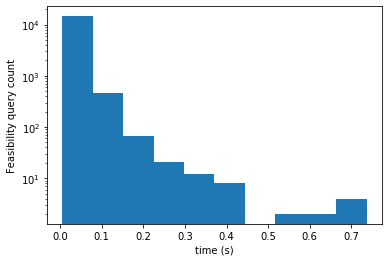

In [3]:
plt.hist(feasibility_times)
plt.xlabel("time (s)")
plt.ylabel("Feasibility query count")
plt.yscale('log')
#plt.savefig("/Users/shawnmeier/Documents/source/bounder_paper/Bounder/paper2/figures/feas_time.png")
plt.show()

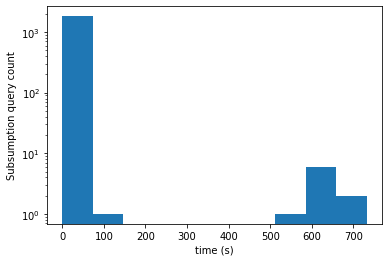

In [4]:
plt.hist(subsumption_times)
plt.xlabel("time (s)")
plt.ylabel("Subsumption query count")
plt.yscale('log')
#plt.savefig("/Users/shawnmeier/Documents/source/bounder_paper/Bounder/paper2/figures/subs_time.png")
plt.show()